## 1. 单纯形上的基函数

### 区间 $[x_0, x_1]$ 上 $p$ 次拉格朗日基函数的构造

#### 重心坐标 

给定区间单元上的一个重心坐标 $(\lambda_0, \lambda_1)$, 存在 $x \in [x_0, x_1]$,  使得：

$$
\lambda_0 := \frac{x_1 - x}{x_1 - x_0}, \quad
\lambda_1 := \frac{x  - x_0}{x_1 - x_0}
$$

显然 
$$ 
\lambda_0 + \lambda_1 = 1
$$

重心坐标关于  $x$ 的导数为：

$$
\frac{\mathrm d \lambda_0}{\mathrm d x} = -\frac{1}{x_1 - x_0},\quad 
\frac{\mathrm d \lambda_1}{\mathrm d x} = \frac{1}{x_1 - x_0}
$$

区间 $[x_0, x_1]$ 上的个 $p\geq 1$ 次基函数共有 
$$
n_{dof} = p+1, 
$$ 

其计算公式如下:

$$
\phi_{m,n} = \frac{p^p}{m!n!}\prod_{l_0 = 0}^{m - 1}
(\lambda_0 - \frac{l_0}{p}) \prod_{l_1 = 0}^{n-1}(\lambda_1 -
\frac{l_1}{p}).
$$

其中 $ m\geq 0$, $n\geq 0$, 且 $m+n=p$, 这里规定:

$$
 \prod_{l_i=0}^{-1}(\lambda_i - \frac{l_i}{p}) := 1,\quad i=0, 1
$$

#### $p$ 次基函数的面向数组的计算

构造向量：
$$
P = ( \frac{1}{0!},  \frac{1}{1!}, \frac{1}{2!}, \cdots, \frac{1}{p!})
$$

构造矩阵：
$$
A :=                                                                            
\begin{pmatrix}  
1  &  1  \\
\lambda_0 & \lambda_1\\                                             
\lambda_0 - \frac{1}{p} & \lambda_1 - \frac{1}{p}\\   
\vdots & \vdots \\                                                     
\lambda_0 - \frac{p - 1}{p} & \lambda_1 - \frac{p - 1}{p}
\end{pmatrix}                                                                   
$$ 

对 $A$ 的每一列做累乘运算, 并左乘由 $P$ 形成的对角矩阵, 得矩阵:

$$
B = \mathrm{diag}(P)
\begin{pmatrix}
1 & 1\\
\lambda_0 & \lambda_1\\
\prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p})\\
\vdots & \vdots \\
\prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p}) 
\end{pmatrix}
$$

易知, 只需从 $B$ 的每一列中各选择一项相乘(要求二项次数之和为 $p$), 再乘以 $p^p$ 即可得到相应的基函数, 其中取法共有 

$$
n_{dof} = {p+1}
$$

构造指标矩阵：

$$
I = \begin{pmatrix}
p  & 0 \\ p-1 & 1 \\ \vdots & \vdots \\ 0 & p 
\end{pmatrix}
$$

则 $p+1$ 个 $p$ 次基函数可写成如下形式 

$$
\phi_i = p^pB_{I_{i,0}, 0}B_{I_{i, 1},1}, \quad i = 0, 1, \cdots, n_{dof}
$$

对应 `Python` 的代码如下:

```Python
phi = p**p*np.prod(B[I, [0, 1]], axis=1)
```

构造矩阵:
$$
F^i = 
\begin{pmatrix}
1 & \lambda_i & \cdots & \lambda_i \\
\lambda_i - \frac{1}{p} & 1 & \cdots & \lambda_i - \frac{1}{p} \\
\vdots & \vdots & \ddots & \vdots \\
\lambda_i - \frac{p-1}{p} & \lambda_i - \frac{p-1}{p} & \cdots & 1
\end{pmatrix}_{p\times p}
, \quad i = 0, 1
$$

记
$$
f_{i,j} = \sum_{m=0}^j\prod_{k=0}^j F^i_{k, m},\quad i = 0, 1, 0 \leq j \leq p-1.
$$

$$
\begin{aligned}
\nabla B = &  
\mathrm{diag}(P)
\begin{pmatrix}
0 & 0 \\
\nabla \lambda_1 & \nabla \lambda_2 \\
\nabla \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p}) & 
\nabla \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p})  \\
\vdots & \vdots \\
\nabla \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 & 0 \\
\nabla \lambda_1 & \nabla \lambda_2\\
f_{0,0} \nabla \lambda_1 & 
f_{1,0} \nabla \lambda_2  \\
\vdots & \vdots \\
f_{0, p-1} \nabla \lambda_1 &
f_{1, p-1} \nabla \lambda_2 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 & 0\\
1 & 1\\
f_{0,0} & 
f_{1,0} \\
\vdots & \vdots  \\
f_{0, p-1} &
f_{1, p-1}   
\end{pmatrix}
\begin{pmatrix}
\nabla \lambda_0 & 0 \\
0 & \nabla \lambda_1 
\end{pmatrix}
\end{aligned}
$$

### 三角形单元

#### 重心坐标

给定三角形单元 $\tau$, 其三个顶点 $\mathbf x_0 :=(x_0,y_0)$, $\mathbf x_1 :=(x_1,y_1)$ 和 $\mathbf x_2 :=(x_2,y_2)$ 逆时针排列, 且不在同一条直线上, 那么向量 $\vec{\mathbf x_0\mathbf x_1}$ 和 $\vec{\mathbf x_0\mathbf x_2}$ 是线性无关的. 这等价于矩阵

$$
A = 
\begin{pmatrix}
x_0 & x_1 & x_2 \\
y_0 & y_1 & y_2 \\
1   & 1   & 1 
\end{pmatrix}
$$

非奇异. 

任给一点 $\mathbf{x}:=(x,y)\in\tau$, 求解下面的线性方程组

$$
A 
\begin{pmatrix}
\lambda_0 \\
\lambda_1\\
\lambda_2  
\end{pmatrix}
=\begin{pmatrix}
x \\
y\\
1  
\end{pmatrix}
$$

可得唯一的一组解$\lambda_0,\lambda_1,\lambda_2$. 

因此对任意二维点 $\mathbf{x}\in\tau$, 有

$$
\mathbf{x}=\lambda_0(\mathbf{x})\mathbf{x}_0 + \lambda_1(\mathbf{x})\mathbf{x}_1 + \lambda_2(\mathbf{x})\mathbf{x}_2 
\text{ 且 } \lambda_0(\mathbf{x}) + \lambda_1(\mathbf{x}) + \lambda_2(\mathbf{x}) = 1. 
$$

$\lambda_0,\lambda_1,\lambda_2$ 称为点 $\mathbf{x}$ 关于点 $\mathbf{x}_0,\mathbf{x}_1$ 和$\mathbf{x}_2$ 的**重心坐标**. 

易知, $\lambda_0, \lambda_1, \lambda_2$ 都是关于 $\mathbf x$ 的线性函数, 且有

\begin{eqnarray*}
\lambda_0(\mathbf x_0) = 1,\quad & \lambda_0(\mathbf x_1) = 0,\quad& \lambda_0(\mathbf x_2) = 0\\
\lambda_1(\mathbf x_0) = 0,\quad & \lambda_1(\mathbf x_1) = 1,\quad& \lambda_1(\mathbf x_2) = 0\\
\lambda_2(\mathbf x_0) = 0,\quad & \lambda_2(\mathbf x_1) = 0,\quad & \lambda_2(\mathbf x_2) = 1\\
\end{eqnarray*}

$\lambda_0, \lambda_1, \lambda_2$ 关于 $\mathbf x$ 的梯度分别为:

$$
\begin{aligned}
\nabla\lambda_0 = \frac{1}{2|\tau|}(\mathbf x_2 - \mathbf x_1)W\\
\nabla\lambda_1 = \frac{1}{2|\tau|}(\mathbf x_0 - \mathbf x_2)W\\
\nabla\lambda_2 = \frac{1}{2|\tau|}(\mathbf x_1 - \mathbf x_0)W\\
\end{aligned}
$$

其中 

$$
W = \begin{pmatrix}
0 & 1\\ -1 & 0 
\end{pmatrix}
$$

####  三角形单元上的 $p$ 次基函数公式

给定三角形单元上的一个重心坐标 $(\lambda_0, \lambda_1, \lambda_2)$, 所有 $p\geq 1$ 次基函数的计算公式如下:

$$
\phi_{m,n,k} = \frac{p^p}{m!n!k!}\prod_{l_0 = 0}^{m - 1}
(\lambda_0 - \frac{l_0}{p}) \prod_{l_1 = 0}^{n-1}(\lambda_1 -
\frac{l_1}{p}) \prod_{l_2=0}^{k-1}(\lambda_2 - \frac{l_2}{p}).
$$

其中 $ m\geq 0$, $n\geq 0$, $ k \geq 0$, 且 $m+n+k=p$, 这里规定:

$$
 \prod_{l_i=0}^{-1}(\lambda_i - \frac{l_i}{p}) := 1,\quad i=0, 1, 2
$$

#### 三角形单元上的 $p$ 次基函数面向矩阵计算

构造向量：
$$
P = ( \frac{1}{0!},  \frac{1}{1!}, \frac{1}{2!}, \cdots, \frac{1}{p!})
$$

构造矩阵：
$$
A :=                                                                            
\begin{pmatrix}  
1  &  1  & 1 \\
\lambda_0 & \lambda_1 & \lambda_2\\                                             
\lambda_0 - \frac{1}{p} & \lambda_1 - \frac{1}{p} & \lambda_2 - \frac{1}{p}\\   
\vdots & \vdots & \vdots \\                                                     
\lambda_0 - \frac{p - 1}{p} & \lambda_1 - \frac{p - 1}{p} & \lambda_2 - \frac{p - 1}{p}
\end{pmatrix}                                                                   
$$ 

对 $A$ 的每一列做累乘运算, 并左乘由 $P$ 形成的对角矩阵, 得矩阵:

$$
B = \mathrm{diag}(P)
\begin{pmatrix}
1 & 1 & 1 \\
\lambda_0 & \lambda_1 & \lambda_2\\
\prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) \\
\vdots & \vdots & \vdots \\
\prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) 
\end{pmatrix}
$$

易知, 只需从 $B$ 的每一列中各选择一项相乘(要求三项次数之和为 $p$), 再乘以 $p^p$ 即可得到相应的基函数, 其中取法共有 

$$
n_{dof} = {(p+1)(p+2)\over 2}
$$

即需要构造 $n_{dof}\times 3$ 的指标矩阵 $I$, 

$$
I = \begin{pmatrix}
p & 0 & 0 \\
p-1 & 1 & 0 \\
p-1 & 0 & 1 \\
p-2 & 2 & 0 \\
p-2 & 1 & 1 \\
p-2 & 0 & 2 \\
\vdots & \vdots & \vdots \\
0   & p & 0 \\
0   & p-1 & 1\\
\vdots & \vdots & \vdots \\
0   & 0  & p
\end{pmatrix}
$$

则基函数可写成如下形式 

$$
\phi_i = p^pB_{I_{i,0}, 0}B_{I_{i, 1},1}B_{I_{i, 2}, 2}, \quad i = 0, 1, \cdots, n_{dof}
$$

对应 `Python` 的代码如下:

```Python
phi = p**p*np.prod(B[I, [0, 1, 2]], axis=1)
```

#### 三角形单元上的 $p$ 次基函数梯度面向数组的计算

**分析:**

根据求导法则, 关键是计算出矩阵

$$
B = \mathrm{diag}(P)
\begin{pmatrix}
1 & 1 & 1 \\
\lambda_0 & \lambda_1 & \lambda_2\\
\prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) \\
\vdots & \vdots & \vdots \\
\prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) 
\end{pmatrix}
$$

中每个元素的梯度. 

构造矩阵:
$$
F^i = 
\begin{pmatrix}
1 & \lambda_i & \cdots & \lambda_i \\
\lambda_i - \frac{1}{p} & 1 & \cdots & \lambda_i - \frac{1}{p} \\
\vdots & \vdots & \ddots & \vdots \\
\lambda_i - \frac{p-1}{p} & \lambda_i - \frac{p-1}{p} & \cdots & 1
\end{pmatrix}_{p\times p}
, \quad i = 0, 1, 2
$$

记
$$
f_{i,j} = \sum_{m=0}^j\prod_{k=0}^j F^i_{k, m},\quad i = 0, 1, 2, 0 \leq j \leq p-1.
$$

$$
\begin{aligned}
\nabla B = &  
\mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0\\
\nabla \lambda_0 & \nabla \lambda_1 & \nabla \lambda_2\\
\nabla \prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & 
\nabla \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p}) &
\nabla \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) \\
\vdots & \vdots & \vdots \\
\nabla \prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0 \\
\nabla \lambda_0 & \nabla \lambda_1 & \nabla \lambda_2\\
f_{0,0} \nabla \lambda_0 & 
f_{1,0} \nabla \lambda_1 &
f_{2,0} \nabla \lambda_2 \\
\vdots & \vdots & \vdots \\
f_{0, p-1} \nabla \lambda_0 &
f_{1, p-1} \nabla \lambda_1 &
f_{2, p-1} \nabla \lambda_2 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
f_{0,0} & 
f_{1,0} &
f_{2,0} \\
\vdots & \vdots & \vdots \\
f_{0, p-1} &
f_{1, p-1} &
f_{2, p-1}  
\end{pmatrix}
\begin{pmatrix}
\nabla \lambda_0 & 0 & 0\\
0 & \nabla \lambda_1 & 0 \\
0 & 0 & \nabla \lambda_2
\end{pmatrix}
\end{aligned}
$$

记 
$$
F =
\mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
f_{0,0} & 
f_{1,0} &
f_{2,0} \\
\vdots & \vdots & \vdots \\
f_{0, p-1} &
f_{1, p-1} &
f_{2, p-1}  
\end{pmatrix}
$$

利用前面的矩阵 $B$, $I$, $Dlambda$, 如下代码即可计算所有单元上的 $p$ 次元基函数的导数:

```Python
pp = p**p
ldof = (p+1)*(p+2)/2
Q = B[I,[0,1,2]]
M = F[I,[0,1,2]]
R = np.zeros((ldof,3), dtype=np.float)
R[:,0] = M[:,0]*Q[:,1]*Q[:,2]
R[:,1] = Q[:,0]*M[:,1]*Q[:,2]
R[:,2] = Q[:,0]*Q[:,1]*M[:,2]
gradphi = np.einsum('ij, kj...->ki...', pp*R, Dlambda) # 爱因斯坦求和
```

### 四面体单元

#### 重心坐标

给定四面体单元 $\tau$, 其三个顶点 $\mathbf x_0 :=(x_0, y_0，z_0)$, $\mathbf x_1 :=(x_1,y_1,z_1)$, $\mathbf x_2 :=(x_2,y_2,z_2)$ 和 $\mathbf x_3 :=(x_3, y_3, z_3)$ 排列满足右手法则, 体积不为零. 这等价于矩阵

$$
A = 
\begin{pmatrix}
x_0 & x_1 & x_2 & x_3\\
y_0 & y_1 & y_2 & y_3\\
z_0 & x_1 & x_2 & x_3\\
1   & 1   & 1 & 1
\end{pmatrix}
$$

非奇异. 

任给一点 $\mathbf{x}:=(x,y)\in\tau$, 求解下面的线性方程组

$$
A 
\begin{pmatrix}
\lambda_0 \\
\lambda_1\\
\lambda_2 \\
\lambda_3
\end{pmatrix}
=\begin{pmatrix}
x \\
y\\
z \\
1  
\end{pmatrix}
$$

可得唯一的一组解$\lambda_0,\lambda_1,\lambda_2, \lambda_3$. 

因此对任意三维点 $\mathbf{x}\in\tau$, 有

$$
\mathbf{x}=\lambda_0(\mathbf{x})\mathbf{x}_0 + \lambda_1(\mathbf{x})\mathbf{x}_1 + \lambda_2(\mathbf{x})\mathbf{x}_2 + \lambda_3(\mathbf{x})\mathbf{x}_3 
\text{ 且 } \lambda_0(\mathbf{x}) + \lambda_1(\mathbf{x}) + \lambda_2(\mathbf{x}) + \lambda_3(\mathbf{x}) = 1. 
$$

$\lambda_0,\lambda_1,\lambda_2, \lambda_3$ 称为点 $\mathbf{x}$ 关于点 $\mathbf{x}_0,\mathbf{x}_1$, $\mathbf{x}_2$ 和 $\mathbf x_3$ 的**重心坐标**. 

易知, $\lambda_0, \lambda_1, \lambda_2， \lambda_3$ 都是关于 $\mathbf x$ 的线性函数, 且有

\begin{eqnarray*}
\lambda_0(\mathbf x_0) = 1,\quad & \lambda_0(\mathbf x_1) = 0,\quad& \lambda_0(\mathbf x_2) = 0,\quad & \lambda_0(\mathbf x_3) = 0\\
\lambda_1(\mathbf x_0) = 0,\quad & \lambda_1(\mathbf x_1) = 1,\quad& \lambda_1(\mathbf x_2) = 0,\quad & \lambda_0(\mathbf x_3) = 0\\
\lambda_2(\mathbf x_0) = 0,\quad & \lambda_2(\mathbf x_1) = 0,\quad & \lambda_2(\mathbf x_2) = 1,\quad & \lambda_0(\mathbf x_3) = 0\\
\lambda_3(\mathbf x_0) = 0,\quad & \lambda_3(\mathbf x_1) = 0,\quad & \lambda_3(\mathbf x_2) = 0,\quad & \lambda_0(\mathbf x_3) = 1\\
\end{eqnarray*}

三维情形的基函数表示如下:
$$
\phi_{m,n,k,v} = \frac{p^p}{m!n!k!v!}\prod_{l_0 = 0}^{m - 1}
(\lambda_0 - \frac{l_0}{p}) \prod_{l_1 = 0}^{n-1}(\lambda_1 -
\frac{l_1}{p}) \prod_{l_2=0}^{k-1}(\lambda_2 - \frac{l_2}{p})\prod_{l_3=0}^{v-1}(\lambda_3 - \frac{l_3}{p}).
$$

其中 $ m\geq 0$, $n\geq 0$, $ k \geq 0$, $v\geq 0$,  且 $m+n+k+v=p$, 这里规定:

$$
 \prod_{l_i=0}^{-1}(\lambda_i - \frac{l_i}{p}) := 1,\quad i=0, 1, 2, 3
$$

构造向量：
$$
P = ( \frac{1}{0!},  \frac{1}{1!}, \frac{1}{2!}, \cdots, \frac{1}{p!})
$$

构造矩阵：
$$
A :=                                                                            
\begin{pmatrix}  
1  &  1  & 1 & 1\\
\lambda_0 & \lambda_1 & \lambda_2 & \lambda_3\\                                             
\lambda_0 - \frac{1}{p} & \lambda_1 - \frac{1}{p} & \lambda_2 - \frac{1}{p} & \lambda_3 - \frac{1}{p}\\   
\vdots & \vdots & \vdots & \vdots \\                                                     
\lambda_0 - \frac{p - 1}{p} & \lambda_1 - \frac{p - 1}{p} & \lambda_2 - \frac{p - 1}{p}& \lambda_3 - \frac{p - 1}{p}
\end{pmatrix}                                                                   
$$ 

对 $A$ 的每一列做累乘运算, 并左乘由 $P$ 形成的对角矩阵, 得矩阵:

$$
B = \mathrm{diag}(P)
\begin{pmatrix}
1 & 1 & 1 & 1\\
\lambda_0 & \lambda_1 & \lambda_2 & \lambda_3\\
\prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_3 - \frac{l}{p}) \\
\vdots & \vdots & \vdots & \vdots \\
\prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_3 - \frac{l}{p}) 
\end{pmatrix}
$$

易知, 只需从 $B$ 的每一列中各选择一项相乘(要求四项次数之和为 $p$), 再乘以 $p^p$ 即可得到相应的基函数, 其中取法共有 

$$
n_{dof} = {(p+1)(p+2)(p+3)\over 6}
$$

即需要构造 $n_{dof}\times 3$ 的指标矩阵 $I$, 

$$
I = \begin{pmatrix}
p & 0 & 0 & 0\\
p-1 & 1 & 0 & 0\\
p-1 & 0 & 1 & 0\\
p-1 & 0 & 0 & 1\\
p-2 & 2 & 0 & 0\\
p-2 & 1 & 1 & 0\\
p-2 & 1 & 0 & 1\\
p-2 & 0 & 2 & 0 \\
p-2 & 0 & 1 & 1 \\
p-2 & 0 & 0 & 2\\
\vdots & \vdots & \vdots & \vdots \\
0   & p & 0 & 0 \\
0   & p-1 & 1 & 0\\
\vdots & \vdots & \vdots & \vdots \\
0   & 0  & 0 & p 
\end{pmatrix}
$$

则基函数可写成如下形式 

$$
\phi_i = p^pB_{I_{i,0}, 0}B_{I_{i, 1},1}B_{I_{i, 2}, 2}B_{I_{i, 3}, 3}, \quad i = 0, 1, \cdots, n_{dof}
$$

对应 `Python` 的代码如下:

```Python
phi = p**p*np.prod(B[I, [0, 1, 2, 3]], axis=1)
```

#### 四面体单元上的 $p$ 次基函数梯度面向数组的计算

**分析:**

根据求导法则, 关键是计算出矩阵

$$
B = \mathrm{diag}(P)
\begin{pmatrix}
1 & 1 & 1 & 1\\
\lambda_0 & \lambda_1 & \lambda_2& \lambda_3\\
\prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p})& \prod_{l=0}^{1}(\lambda_3 - \frac{l}{p}) \\
\vdots & \vdots & \vdots \\
\prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) & \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p})
& \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p})& \prod_{l=0}^{p-1}(\lambda_3 - \frac{l}{p}) 
\end{pmatrix}
$$

中每个元素的梯度. 

构造矩阵:
$$
F^i = 
\begin{pmatrix}
1 & \lambda_i & \cdots & \lambda_i \\
\lambda_i - \frac{1}{p} & 1 & \cdots & \lambda_i - \frac{1}{p} \\
\vdots & \vdots & \ddots & \vdots \\
\lambda_i - \frac{p-1}{p} & \lambda_i - \frac{p-1}{p} & \cdots & 1
\end{pmatrix}_{p\times p}
, \quad i = 0, 1, 2, 3
$$

记
$$
f_{i,j} = \sum_{m=0}^j\prod_{k=0}^j F^i_{k, m},\quad i = 0, 1, 2,3\quad 0 \leq j \leq p-1.
$$

$$
\begin{aligned}
\nabla B = &  
\mathrm{diag}(P)
\begin{pmatrix}
0 &0 & 0 & 0\\
\nabla \lambda_0 &\nabla \lambda_1 & \nabla \lambda_2 & \nabla \lambda_3\\
\nabla \prod_{l=0}^{1}(\lambda_0 - \frac{l}{p}) & 
\nabla \prod_{l=0}^{1}(\lambda_1 - \frac{l}{p}) & 
\nabla \prod_{l=0}^{1}(\lambda_2 - \frac{l}{p}) &
\nabla \prod_{l=0}^{1}(\lambda_3 - \frac{l}{p}) \\
\vdots &\vdots & \vdots & \vdots \\
\nabla \prod_{l=0}^{p-1}(\lambda_0 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_1 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_2 - \frac{l}{p}) &
\nabla \prod_{l=0}^{p-1}(\lambda_3 - \frac{l}{p}) 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 &0 & 0 & 0 \\
\nabla \lambda_0 &\nabla \lambda_1 & \nabla \lambda_2 & \nabla \lambda_3\\
f_{0,0} \nabla \lambda_0 & 
f_{1,0} \nabla \lambda_1 &
f_{2,0} \nabla \lambda_2 &
f_{3,0} \nabla \lambda_3 \\
\vdots &\vdots & \vdots & \vdots \\
f_{0, p-1} \nabla \lambda_0 &
f_{1, p-1} \nabla \lambda_1 &
f_{2, p-1} \nabla \lambda_2 &
f_{3, p-1} \nabla \lambda_3 
\end{pmatrix}\\
= & \mathrm{diag}(P)
\begin{pmatrix}
0 &0 & 0 & 0\\
1 &1 & 1 & 1\\
f_{0,0} & 
f_{1,0} &
f_{2,0} &
f_{3,0} \\
\vdots &\vdots & \vdots & \vdots \\
f_{0, p-1} &
f_{1, p-1} &
f_{2, p-1} &
f_{3, p-1}
\end{pmatrix}
\begin{pmatrix}
\nabla \lambda_0 & 0 & 0& 0\\
0 & \nabla \lambda_1 & 0 & 0\\
0 & 0 & \nabla \lambda_2 & 0\\
0 & 0 & 0 & \nabla \lambda_3 
\end{pmatrix}
\end{aligned}
$$

记 
$$
F =
\mathrm{diag}(P)
\begin{pmatrix}
0 & 0 & 0& 0\\
1 & 1 & 1 & 1\\
f_{0,0} & 
f_{1,0} &
f_{2,0} &
f_{3,0} \\
\vdots &\vdots & \vdots & \vdots \\
f_{0, p-1} &
f_{1, p-1} &
f_{2, p-1} &
f_{3, p-1}  
\end{pmatrix}
$$

利用前面的矩阵 $B$, $I$, $Dlambda$, 如下代码即可计算所有单元上的 $p$ 次元基函数的导数:

```Python
pp = p**p
ldof = p(p+1)*(p+2)/6
Q = B[I,[0,1,2,3]]
M = F[I,[0,1,2,3]]
R = np.zeros((ldof,4), dtype=np.float)
R[:,0] = M[:,0]*Q[:,1]*Q[:,2]*Q[:,3]
R[:,1] = Q[:,0]*M[:,1]*Q[:,2]*Q[:,3]
R[:,2] = Q[:,0]*Q[:,1]*M[:,2]*Q[:,3]
R[:,3] = Q[:,0]*Q[:,1]*Q[:,2]*M[:,3]
gradphi = np.einsum('ij, kj...->ki...', pp*R, Dlambda) # 爱因斯坦求和
```

## 四边形单元

给定一个四边形单元 $\tau := (\mathbf x_0, \mathbf x_1, \mathbf x_2, \mathbf x_3)$, 可以建立它与参考单元之间的映射关系

$$
A :=
\begin{pmatrix}
1 - \xi \\
\xi
\end{pmatrix}
\begin{pmatrix}
1 - \eta & \eta
\end{pmatrix}
= 
\begin{pmatrix}
(1-\xi)(1-\eta) & (1-\xi)\eta\\
\xi(1-\eta) & \xi\eta
\end{pmatrix}
$$

$$
\mathbf x(\xi, \eta) =
\begin{pmatrix}
(1-\xi)(1-\eta) & (1-\xi)\eta & \xi(1-\eta) & 
\xi\eta
\end{pmatrix}
\begin{pmatrix}
x_0 \\ x_1 \\ x_2 \\ x_3
\end{pmatrix}
$$


$$
\begin{pmatrix}
\frac{\mathrm d x}{\mathrm d \xi} & \frac{\mathrm d x}{\mathrm d\eta}\\
\frac{\mathrm d y}{\mathrm d \xi} & \frac{\mathrm d y}{\mathrm d\eta}
\end{pmatrix}
=
\begin{pmatrix}
(\eta - 1)x_0 -\eta x_1 + (1 - \eta) x_2 + \eta x_3 & (\xi - 1)x_0 + (1 - \xi) x_1  - \xi x_2 + \xi x_3\\
(\eta - 1)y_0 -\eta y_1 + (1 - \eta) y_2 + \eta y_3 & (\xi - 1)y_0 + (1 - \xi) y_1  - \xi y_2 + \xi y_3
\end{pmatrix}
$$

$$
\begin{pmatrix}
\frac{\mathrm d x}{\mathrm d \xi} & \frac{\mathrm d x}{\mathrm d\eta}\\
\frac{\mathrm d y}{\mathrm d \xi} & \frac{\mathrm d y}{\mathrm d\eta}
\end{pmatrix}
=
\begin{pmatrix}
x_2 - x_0 & x_1 - x_0\\
y_2 - y_0 & y_1 - y_0
\end{pmatrix}
+
\begin{pmatrix}
x_0 - x_1 - x_2 + x_3\\
y_0 - y_1 - y_2 + y_3
\end{pmatrix}
\begin{pmatrix}
\eta & \xi
\end{pmatrix}
$$

记 $\lambda_0 = 1-x$, $\lambda_1 = x$, 利用上面的方法可以构造 $[0, 1]$ 区间上的一元 $p$ 次元基函数


对应 `Python` 的代码如下:

```Python
phi = p**p*np.prod(B[I, [0, 1]], axis=1)
```

每个基函数关于 $x$ 的导数的计算代码如下：


```Python
pp = p**p
ldof = p+1
Q = B[I,[0,1]]
M = F[I,[0,1]]
gradphi = -M[:,0]*Q[:,1] + Q[:,0]*M[:,1]
```


$$
\Phi(x) = (\phi_0(x), \phi_1(x), \cdots, \phi_{p}(x))
$$

参考单元上的双 $p$ 次元基函数为 

$$
\Phi^T(\xi)\Phi(\eta) =
\begin{pmatrix}
\phi_0(\xi)\phi_0(\eta) & \phi_0(\xi)\phi_1(\eta) & \cdots & \phi_0(\xi)\phi_p(\eta)\\
\phi_1(\xi)\phi_0(\eta) & \phi_1(\xi)\phi_1(\eta) & \cdots & \phi_1(\xi)\phi_p(\eta)\\
\vdots & \vdots & \ddots & \vdots \\
\phi_p(\xi)\phi_0(\eta) & \phi_p(\xi)\phi_1(\eta) & \cdots & \phi_p(\xi)\phi_p(\eta)
\end{pmatrix}
$$

梯度的计算公式为

$$
\left(\frac{\mathrm d \Phi^T(\xi)}{\mathrm d \xi}\Phi(\eta), \Phi^T(\xi)\frac{\mathrm d \Phi^T(\eta)}{\mathrm d\eta}\right)
$$

## 六面体单元

给定一个六面体单元 $\tau := (x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7)$, 建立它与参考单元的映射关系：

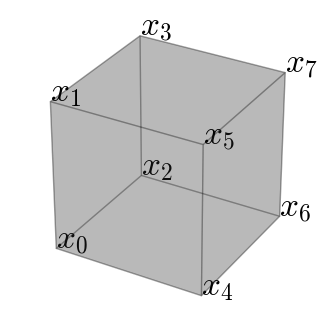

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [0, 1]
Y, X, Z = np.meshgrid(r, r, r)
x = X.reshape(-1)
y = Y.reshape(-1)
z = Z.reshape(-1)

X, Y = np.meshgrid(r, r)
ax.plot_surface(X,Y,1, alpha=0.2, color='grey')
ax.plot_surface(X,Y,0, alpha=0.2, color='grey')
ax.plot_surface(X,0,Y, alpha=0.2, color='grey')
ax.plot_surface(X,1,Y, alpha=0.2, color='grey')
ax.plot_surface(1,X,Y, alpha=0.2, color='grey')
ax.plot_surface(0,X,Y, alpha=0.2, color='grey')

#for s, e in combinations(np.array(list(product(r, r, r))), 2):
#    if np.sum(np.abs(s-e)) == r[1]-r[0]:
#        ax.plot3D(*zip(s, e), color="b")
#ax.scatter3D(X, Y, Z)

s = ['$x_0$', '$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$', '$x_6$', '$x_7$']
for i in range(8):
    ax.text3D(x[i], y[i], z[i], s[i], fontsize=24)
ax.axis('off')
plt.show()

In [30]:
np.arange(2, 4) + np.arange(0, 8, 4).reshape(-1, 1)

array([[2, 3],
       [6, 7]])

In [2]:
from sympy import *

x, y, z = symbols('x y z')
p0, p1, p2, p3, p4, p5, p6, p7 = symbols('p_0, p_1, p_2, p_3, p_4, p_5, p_6, p_7')
init_printing()

In [6]:
phix = [1-x, x]
phiy = [1-y, y]
phiz = [1-z, z]
phi = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            phi.append([phix[i]*phiy[j]*phiz[k]])
phi = Matrix(phi)
X = Matrix([p0, p1, p2, p3, p4, p5, p6, p7])
ref = (Transpose(X)*phi)[0, 0]
dx = expand(diff(ref, x))
dy = expand(diff(ref, y))
dz = expand(diff(ref, z))
dx

In [7]:
dy

In [8]:
dz

$$
(x_1 - x_0 + x_2 - x_3 + x_4 - x_5 + x_7 - x_6)\eta\beta + (x_0 - x_2 + x_6 - x_4)\eta + (x_0 - x_1 + x_5 - x_4)\beta + (x_4 - x_0)\\
(x_1 - x_0 + x_2 - x_3 + x_4 - x_5 + x_7 - x_6)\beta\xi + (x_0 - x_1 + x_3 - x_2)\beta + (x_0 - x_2 + x_6 - x_4)\xi  + (x_2 - x_0)\\
(x_1 - x_0 + x_2 - x_3 + x_4 - x_5 + x_7 - x_6)\xi\eta + (x_0 - x_1 + x_5 - x_4)\xi + (x_0 - x_1 + x_3 - x_2)\eta + (x_1 - x_0)  
$$

$$
\begin{pmatrix}
\frac{\mathrm d x}{\mathrm d \xi} & \frac{\mathrm d x}{\mathrm d\eta} & \frac{\mathrm d x}{\mathrm d\beta}\\
\frac{\mathrm d y}{\mathrm d \xi} & \frac{\mathrm d y}{\mathrm d\eta} & \frac{\mathrm d y}{\mathrm d\beta}\\
\frac{\mathrm d z}{\mathrm d \xi} & \frac{\mathrm d z}{\mathrm d\eta} & \frac{\mathrm d z}{\mathrm d\beta}\\
\end{pmatrix}
$$

In [25]:
import numpy as np

idx = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 0],
        [2, 3, 0, 1],
        [3, 0, 1, 2],
        [0, 3, 2, 1],
        [1, 0, 3, 2],
        [2, 1, 0, 3],
        [3, 2, 1, 0],   
    ])

idx0 = np.array([
        [0, 1, 2, 3, 4, 5, 6, 7, 8],
        [2, 5, 8, 1, 4, 7, 0, 3, 6],
        [8, 7, 6, 5, 4, 3, 2, 1, 0],
        [6, 3, 0, 7, 4, 1, 8, 5, 2],
        [0, 3, 6, 1, 4, 7, 2, 5, 8],
        [6, 7, 8, 3, 4, 5, 0, 1, 2],
        [8, 5, 2, 7, 4, 1, 6, 3, 0],
        [2, 1, 0, 5, 4, 3, 8, 7, 6],
    ])
print(idx0.reshape(8, 3, 3))

[[[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[2 5 8]
  [1 4 7]
  [0 3 6]]

 [[8 7 6]
  [5 4 3]
  [2 1 0]]

 [[6 3 0]
  [7 4 1]
  [8 5 2]]

 [[0 3 6]
  [1 4 7]
  [2 5 8]]

 [[6 7 8]
  [3 4 5]
  [0 1 2]]

 [[8 5 2]
  [7 4 1]
  [6 3 0]]

 [[2 1 0]
  [5 4 3]
  [8 7 6]]]


In [32]:
a = np.array([
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

I = np.array([0, 2, 3, 1, 0, 2, 0, 1])
b = np.zeros((len(I), 3, 3))
for i, k in enumerate(I):
    b[i] = np.rot90(a, k=k)

[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 8.  7.  6.]
  [ 5.  4.  3.]
  [ 2.  1.  0.]]

 [[ 6.  3.  0.]
  [ 7.  4.  1.]
  [ 8.  5.  2.]]

 [[ 2.  5.  8.]
  [ 1.  4.  7.]
  [ 0.  3.  6.]]

 [[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 8.  7.  6.]
  [ 5.  4.  3.]
  [ 2.  1.  0.]]

 [[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 2.  5.  8.]
  [ 1.  4.  7.]
  [ 0.  3.  6.]]]


In [35]:
np.linspace(0, 1, 3)

array([ 0. ,  0.5,  1. ])

Hamiltontian 